# Libraries

In [0]:
%tensorflow_version 1.x

In [0]:
import pandas,numpy,h5py,urllib,zipfile
import keras,pylab,sklearn,tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.datasets import mnist,cifar10,boston_housing
from sklearn.datasets import fetch_20newsgroups
import warnings; warnings.filterwarnings("ignore")

In [0]:
from keras.models import Sequential,Model
from keras.layers import Conv1D,Conv2D,MaxPooling1D,MaxPooling2D
from keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.layers import Input,Dense,LSTM,Activation,Flatten,Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
from keras import __version__; print('keras version:',__version__)
print('tensorflow version:',tf.__version__)

keras version: 2.2.5
tensorflow version: 1.15.0


In [0]:
pylab.style.use('seaborn-whitegrid')
def loss_plot(fit_history,n):
    pylab.figure(figsize=(12,5));
    pylab.plot(fit_history.history['loss'][n:],label='train')
    pylab.plot(fit_history.history['val_loss'][n:],label='test')
    pylab.legend(); pylab.title('Loss Function');  
def acc_plot(fit_history,n):
    pylab.figure(figsize=(12,5))
    pylab.plot(fit_history.history['acc'][n:],label='train')
    pylab.plot(fit_history.history['val_acc'][n:],label='test')
    pylab.legend(); pylab.title('Accuracy'); 
def mae_plot(fit_history,n):
    pylab.figure(figsize=(12,5))
    pylab.plot(fit_history.history['mean_absolute_error'][n:],label='train')
    pylab.plot(fit_history.history['val_mean_absolute_error'][n:],label='test')
    pylab.legend(); pylab.title('Mean Absolute Error');

# Data
## internal datasets

In [0]:
# 32x32 color images; labeled over 10 categories
(x_train1,y_train1),(x_test1,y_test1)=cifar10.load_data()
n=int(len(x_test1)/2)
x_valid1,y_valid1=x_test1[:n],y_test1[:n]
x_test1,y_test1=x_test1[n:],y_test1[n:]
c_y_train1=keras.utils.to_categorical(y_train1,10)
c_y_valid1=keras.utils.to_categorical(y_valid1,10)
c_y_test1=keras.utils.to_categorical(y_test1,10)
x_train1.shape,x_valid1.shape,x_test1.shape

((50000, 32, 32, 3), (5000, 32, 32, 3), (5000, 32, 32, 3))

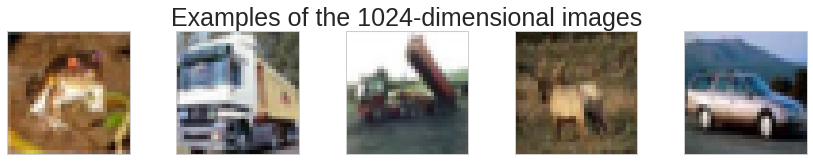

In [0]:
fig,ax=pylab.subplots(figsize=(12,2),nrows=1,ncols=5,sharex=True,sharey=True)
ax=ax.flatten()
for i in range(5):ax[i].imshow(x_train1[i])
ax[0].set_xticks([]); ax[0].set_yticks([]); pylab.tight_layout(); pylab.gcf()
ax[2].set_title('Examples of the 1024-dimensional images',fontsize=25);

In [0]:
# 28x28 grayscale images; labeled over 10 categories
(x_train2,y_train2),(x_test2,y_test2)=mnist.load_data()
n=int(len(x_test2)/2)
x_valid2,y_valid2=x_test2[:n],y_test2[:n]
x_test2,y_test2=x_test2[n:],y_test2[n:]
c_y_train2=keras.utils.to_categorical(y_train2,10)
c_y_valid2=keras.utils.to_categorical(y_valid2,10)
c_y_test2=keras.utils.to_categorical(y_test2,10)
x_train2.shape,x_valid2.shape,x_test2.shape

((60000, 28, 28), (5000, 28, 28), (5000, 28, 28))

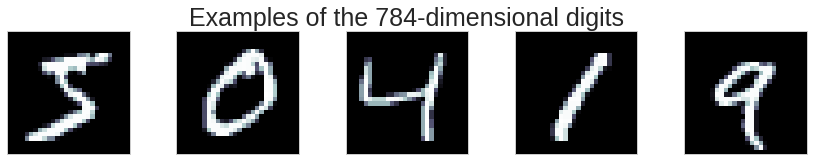

In [0]:
fig,ax=pylab.subplots(figsize=(12,2),nrows=1,ncols=5,sharex=True,sharey=True)
ax=ax.flatten()
for i in range(5):
    image=x_train2[i].reshape(28,28); ax[i].imshow(image,cmap=pylab.cm.bone)
ax[0].set_xticks([]); ax[0].set_yticks([]); pylab.tight_layout(); pylab.gcf()
ax[2].set_title('Examples of the 784-dimensional digits',fontsize=25);

In [0]:
# 18000 newsgroups posts on 20 topics
train=fetch_20newsgroups(subset='train',shuffle=True,
                         remove=('headers','footers','quotes'))
test=fetch_20newsgroups(subset='test',shuffle=True,
                        remove=('headers','footers','quotes'))
y_train3,y_test3=train.target,test.target
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words='english')
x_train3=vectorizer.fit_transform(train.data)
x_test3=vectorizer.transform(test.data)
del train,test
x_test3,x_valid3,y_test3,y_valid3=\
train_test_split(x_test3,y_test3,test_size=0.5,random_state=1)
c_y_train3=keras.utils.to_categorical(y_train3,20)
c_y_valid3=keras.utils.to_categorical(y_valid3,20)
c_y_test3=keras.utils.to_categorical(y_test3,20)
x_train3.shape,x_valid3.shape,x_test3.shape

((11314, 101322), (3766, 101322), (3766, 101322))

In [0]:
# 13 attributes of houses at different locations
# targets are the median values of the houses at a location (in k$)
(x_train4,y_train4),(x_test4,y_test4)=boston_housing.load_data()
n=int(len(x_test4)/2)
x_valid4,y_valid4=x_test4[:n],y_test4[:n]
x_test4,y_test4=x_test4[n:],y_test4[n:]
x_train4.shape,x_valid4.shape,x_test4.shape

((404, 13), (51, 13), (51, 13))

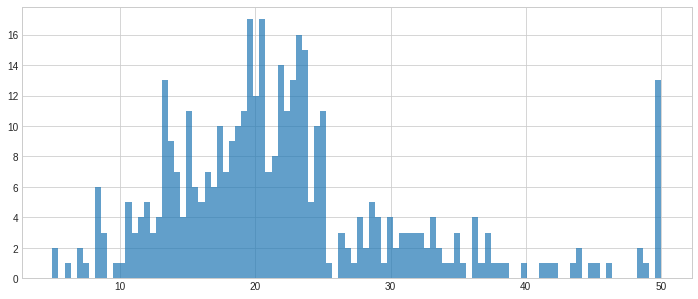

In [0]:
pylab.figure(figsize=(12,5)); pylab.hist(y_train4,bins=100,alpha=0.7);

## artificial datasets

In [0]:
# Classification; the artificial set, labeled over 2 categories 
X5,Y5=make_classification(n_samples=10000,n_features=2,
                          n_redundant=0,n_informative=2)
x_train5,x_test5,y_train5,y_test5=\
train_test_split(X5,Y5,test_size=0.2,random_state=1)
n=int(len(x_test5)/2)
x_valid5,y_valid5=x_test5[:n],y_test5[:n]
x_test5,y_test5=x_test5[n:],y_test5[n:]
x_train5.shape,x_valid5.shape,x_test5.shape

((8000, 2), (1000, 2), (1000, 2))

(8000, 3) (1000, 3) (1000, 3)


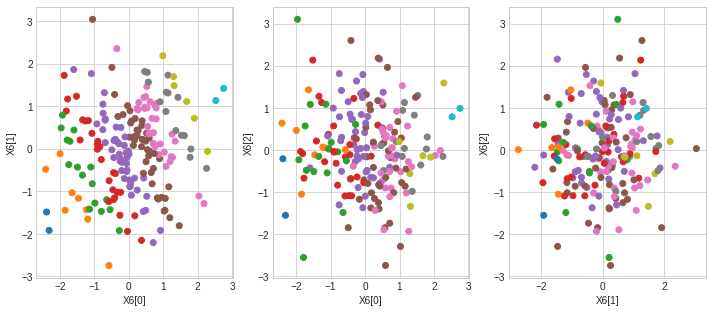

In [0]:
# Regression; 10000x3 matrix, 3 features (2 responsible for targets), 
# 1 target, 0.97 - the bias factor
[X6,Y6]=make_regression(10000,3,2,1,0.97)
x_train6,x_test6,y_train6,y_test6=\
train_test_split(X6,Y6,test_size=0.2,random_state=1)
n=int(len(x_test6)/2)
x_valid6,y_valid6=x_test6[:n],y_test6[:n]
x_test6,y_test6=x_test6[n:],y_test6[n:]
print(x_train6.shape,x_valid6.shape,x_test6.shape)
f,ax=pylab.subplots(ncols=3,figsize=(12,5)); k=[[0,1],[0,2],[1,2]]
[ax[i].scatter(X6[:200,k[i][0]],X6[:200,k[i][1]],
               c=Y6[:200],cmap=pylab.cm.tab10) for i in range(3)]
[ax[i].set_xlabel('X6[%d]'%k[i][0]) for i in range(3)]
[ax[i].set_ylabel('X6[%d]'%k[i][1]) for i in range(3)]
pylab.show()

## external datasets

(11352, 32, 32, 3) (1419, 32, 32, 3) (1419, 32, 32, 3)
ё


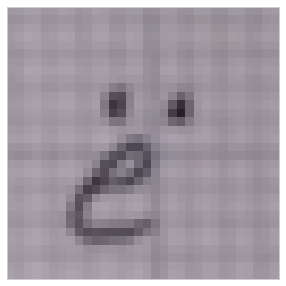

In [0]:
path='https://olgabelitskaya.github.io/'
zf='LetterColorImages_123.h5.zip'
input_file=urllib.request.urlopen(path+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r'); keys=list(f.keys())
letters=u'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
letter_images=numpy.array(f[keys[1]])/255
targets=numpy.array(f[keys[2]])
x_train7,x_test7,y_train7,y_test7=\
train_test_split(letter_images,targets,test_size=0.2,random_state=1)
del letter_images,targets
x_test7,x_valid7,y_test7,y_valid7=\
train_test_split(x_test7,y_test7,test_size=0.5,random_state=1)
c_y_train7=keras.utils.to_categorical(y_train7-1,33)
c_y_valid7=keras.utils.to_categorical(y_valid7-1,33)
c_y_test7=keras.utils.to_categorical(y_test7-1,33)
print(x_train7.shape,x_valid7.shape,x_test7.shape)
print(letters[y_train7[2000]-1]); pylab.figure(figsize=(5,5))
pylab.xticks([]); pylab.yticks([]) 
pylab.imshow(x_train7[2000]); pylab.show()

(388, 150, 150, 3) (49, 150, 150, 3) (48, 150, 150, 3)
Gorodets


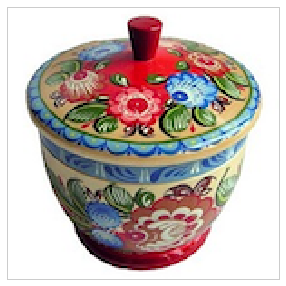

In [0]:
path='https://olgabelitskaya.github.io/'
zf='DecorColorImages.h5.zip'
input_file=urllib.request.urlopen(path+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r'); keys=list(f.keys()) 
decors=numpy.array(f[keys[1]])
images=numpy.array(f[keys[2]])/255
x_train8,x_test8,y_train8,y_test8=\
train_test_split(images,decors,test_size=0.2,random_state=1)
del images,decors
decors=['Gzhel','Khokhloma','Gorodets','Wycinanki łowickie',
        'Iznik','Neglyubka','Wzory kaszubskie']
x_test8,x_valid8,y_test8,y_valid8=\
train_test_split(x_test8,y_test8,test_size=0.5,random_state=1)
c_y_train8=keras.utils.to_categorical(y_train8-1,7)
c_y_valid8=keras.utils.to_categorical(y_valid8-1,7)
c_y_test8=keras.utils.to_categorical(y_test8-1,7)
print(x_train8.shape,x_valid8.shape,x_test8.shape)
print(decors[y_train8[10]-1]); pylab.figure(figsize=(5,5))
pylab.xticks([]); pylab.yticks([]) 
pylab.imshow(x_train8[10]); pylab.show()

# Basic Examples

##### Compilation

*Optimizers:*

- 'adam', 'nadam', 
- 'adagrad', 'adadelta', 'adamax',
- 'sgd', 'rmsprop',
- TFOptimizer.

*Loss functions:*

- 'mean_squared_error'('mse'), 'mean_absolute_error'('mae'), 
- 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
- 'squared_hinge', 'hinge', 'categorical_hinge',
- 'categorical_crossentropy', 'sparse_categorical_crossentropy',
- 'binary_crossentropy',
- 'kullback_leibler_divergence',
- 'poisson',
- 'cosine_proximity',
- 'logcosh'.

*Metrics:*

- mae, mse, acc,
- binary_accuracy, 
- categorical_accuracy, sparse_categorical_accuracy,
- top_k_categorical_accuracy, sparse_top_k_categorical_accuracy.

---

*For a multi-class classification problem:*

- model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

*For a binary classification problem:*

- model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

*For a mean squared error regression problem:*

- model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
- model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
----

##### Activation

- [Neural Networks. CS231](http://cs231n.github.io/neural-networks-1/)

*Types:*

- 'elu', 'selu', 'relu', 'tanh', 'linear', 'softmax', 'softplus', 'softsign', 'sigmoid', 'hard_sigmoid'
- LeakyReLU, PReLU, ELU, ThresholdedReLU

*For a multi-class classification problem:*

- 'softmax'

*For a binary classification problem:*

- 'sigmoid'

*For a mean squared error regression problem:*

- 'linear'

##### Layers

1. *Core Layers*
  - [Keras Documentation. Core Layers](https://keras.io/layers/core/) 
  - `Input` layers hold an input tensor (for example, the pixel values of the image with width 32, height 32, and 3 color channels).
  - `Dense` (fully connected) layers compute the class scores, resulting in volume of size. For example, the size [11] corresponds to class scores, such as 10 digits and 1 empty place. Each neuron in these layers are connected to all the numbers in the previous volume.
  - `Activation` applies an activation function to an output. This leaves the size of the volume unchanged.
  - `Dropout` layers consist in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting. This leaves the size of the volume unchanged.
  - `Reshape` layers convert an output to a certain shape.
  - `Flatten` layers flatten the input and collapses it into the one-dimensional feature vector. This results in the volume such as [2, 30, 64] -> [3840].
  - etc.

2. *Convolutional Layers* 
  - [Keras Documentation. Convolutional Layers](https://keras.io/layers/convolutional/)
  - [Convolutional Neural Networks. Fei-Fei Li & Andrej Karpathy & Justin Johnson](http://cs231n.stanford.edu/slides/2016/winter1516_lecture7.pdf)
  - [Convolutional Neural Networks. Mirella Lapata](https://www.inf.ed.ac.uk/teaching/courses/nlu/lectures/nlu_l15_convolution-2x2.pdf)   
  - `Conv1D` layers (temporal convolution) convolve the filter with the signal, i.e. “is sliding over the signal vector, computing dot products”. Here the filter is an integer, the dimensionality of the output space (i.e. the number output of filters in the convolution) and the kernel size is an integer, specifying the length of the 1D convolution window.
  - `Conv2D` layers (spatial convolution over images) compute the output of neurons that are connected to local regions in the input each computing a dot product between their weights and a small region they are connected to in the input volume. This results in the volume such as [64, 64, 1] -> [64, 64, 32] when it was used 32 filters.
  - `Conv3D` layers (spatial convolution over volumes).
  - `SeparableConv2D`, `Conv2DTranspose`.
  - etc.

3. *Recurrent Layers*
  - `SimpleRNN` layers are fully-connected RNN. This leaves the size of the volume unchanged.
  - `LSTM` layers.
  - `GRU` layers.

4. *Pooling Layers*
  - [Convolutional Neural Networks. CS231](http://cs231n.github.io/convolutional-networks/) 
  - `MaxPooling2D` layers perform a downsampling operation along the spatial dimensions (width, height). Max-pooling partitions the input image into a set of non-overlapping rectangles and, for each such subregion, outputs the maximum value. This results in the volume such as [28, 28, 32] -> [14, 14, 32].
  - `MaxPooling1D` & `MaxPooling3D` is a max pooling operation for temporal (1D) data and spatial or spatio-temporal (3D) data  respectively.
  
5. *Advanced Activations Layers*
  - `LeakyReLU`.
    - $\mathbf {f(x) = alpha * x for x < 0, f(x) = x for x >= 0}$, alpha is a small gradient.
  - `PReLU`.
    - $\mathbf {f(x) = alpha * x for x < 0, f(x) = x for x >= 0}$, alpha is a learned array.
  - `ELU`.
    - $\mathbf {f(x) =  alpha * (exp(x) - 1.) for x < 0, f(x) = x for x >= 0}$, alpha is a small gradient.
  - `ThresholdedReLU`.
    - $\mathbf {f(x) = x for x > theta, f(x) = 0}$ otherwise.
    
etc.

1000/1000 [==============================] - 0s 34us/step
[0.07259591248631478, 0.979]


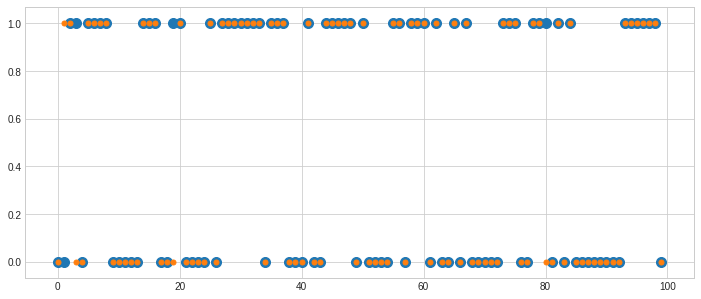

In [0]:
# The basic model for binary classification
basic_model=Sequential([Dense(16,input_dim=2),Activation('relu'),
                        Dense(1),Activation('sigmoid')])
basic_model.compile(optimizer='adam',loss='binary_crossentropy',
                    metrics=['accuracy'])
# Train 
basic_model.fit(x_train5,y_train5,
                validation_data=(x_valid5,y_valid5),
                epochs=100,batch_size=16,verbose=0)
# Predict classes
y_test5_predictions=basic_model.predict_classes(x_test5)
print(basic_model.evaluate(x_test5,y_test5))
pylab.figure(figsize=(12,5))
pylab.scatter(range(100),y_test5[:100],s=100)
pylab.scatter(range(100),y_test5_predictions[:100],s=25);

In [0]:
# Model parameters
[basic_model.input,basic_model.outputs,
 basic_model.input_shape,basic_model.output_shape]

[<tf.Tensor 'dense_3_input:0' shape=(?, 2) dtype=float32>,
 [<tf.Tensor 'activation_4/Sigmoid:0' shape=(?, 1) dtype=float32>],
 (None, 2),
 (None, 1)]

In [0]:
basic_model.summary(),basic_model.get_config()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


(None,
 {'layers': [{'class_name': 'Dense',
    'config': {'activation': 'linear',
     'activity_regularizer': None,
     'batch_input_shape': (None, 2),
     'bias_constraint': None,
     'bias_initializer': {'class_name': 'Zeros', 'config': {}},
     'bias_regularizer': None,
     'dtype': 'float32',
     'kernel_constraint': None,
     'kernel_initializer': {'class_name': 'VarianceScaling',
      'config': {'distribution': 'uniform',
       'mode': 'fan_avg',
       'scale': 1.0,
       'seed': None}},
     'kernel_regularizer': None,
     'name': 'dense_3',
     'trainable': True,
     'units': 16,
     'use_bias': True}},
   {'class_name': 'Activation',
    'config': {'activation': 'relu',
     'dtype': 'float32',
     'name': 'activation_3',
     'trainable': True}},
   {'class_name': 'Dense',
    'config': {'activation': 'linear',
     'activity_regularizer': None,
     'bias_constraint': None,
     'bias_initializer': {'class_name': 'Zeros', 'config': {}},
     'bias_regulariz

In [0]:
# Save/reload models
# basic_model.save('basic_model.h5')
# basic_model = load_model('basic_model.h5')

# Save/reload weights
# basic_model.save_weights('basic_model_weights.h5')
# basic_model.load_weights('basic_model_weights.h5', by_name=False)

In [0]:
optimizer=keras.optimizers.Nadam(lr=0.005,beta_1=0.99,beta_2=0.9999,
                                 epsilon=None,schedule_decay=0.005)
basic_model=Sequential([Dense(16,input_dim=2),Activation('relu'),
                        Dense(1),Activation('sigmoid')])
basic_model.compile(optimizer=optimizer,loss='binary_crossentropy',
                    metrics=['accuracy'])
basic_model.fit(x_train5,y_train5,validation_data=(x_valid5,y_valid5),
                epochs=100,batch_size=16,verbose=0)
basic_model.evaluate(x_test5,y_test5)

1000/1000 [==============================] - 0s 36us/step


[0.07594008412957191, 0.977]

In [0]:
inp=Input(shape=(2,)); act=keras.layers.LeakyReLU(alpha=0.4)
lay=act(Dense(16,name='encoder')(inp))
out=Dense(1,activation='sigmoid',name='decoder')(lay)
basic_model=Model(inputs=inp,outputs=out,name='cae')
basic_model.compile(optimizer=optimizer,loss='binary_crossentropy',
                    metrics=['accuracy'])
basic_model.fit(x_train5,y_train5,validation_data=(x_valid5,y_valid5),
                epochs=100,batch_size=16,verbose=0)
basic_model.evaluate(x_test5,y_test5)

1000/1000 [==============================] - 0s 39us/step


[0.07405788084864616, 0.978]

In [0]:
fw='weights.best.basic_model.hdf5'
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               patience=5,factor=0.5)
basic_model=Model(inputs=inp,outputs=out,name='cae')
basic_model.compile(optimizer=optimizer,loss='binary_crossentropy',
                    metrics=['accuracy'])
basic_model.fit(x_train5,y_train5,validation_data=(x_valid5,y_valid5),
                epochs=200,batch_size=16,verbose=0, 
                callbacks=[early_stopping,checkpointer,lr_reduction])
basic_model.load_weights('weights.best.basic_model.hdf5')
basic_model.evaluate(x_test5,y_test5)

1000/1000 [==============================] - 0s 43us/step


[0.06941641923785209, 0.98]

# Neural Networks
## Multi-Layer Perceptrons

0.9366 0.9046


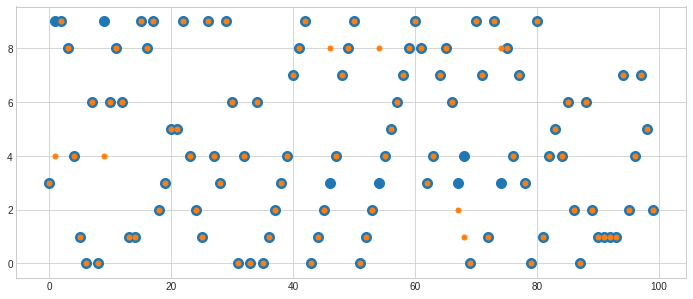

In [0]:
# MLP: Multi-Class Image Classification (Handwritten Digits)
clf=MLPClassifier(hidden_layer_sizes=(256,),max_iter=5,solver='adam',
                  verbose=0,random_state=1,learning_rate_init=.01)
clf.fit(x_train2.reshape(-1,784),y_train2)
print(clf.score(x_test2.reshape(-1,784),y_test2),
      clf.score(x_valid2.reshape(-1,784),y_valid2))
y_test2_predictions=clf.predict(x_test2.reshape(-1,784))
pylab.figure(figsize=(12,5)); pylab.scatter(range(100),y_test2[:100],s=100)
pylab.scatter(range(100),y_test2_predictions[:100],s=25); pylab.show()

In [0]:
def model():
    model=Sequential()    
    model.add(Dense(32,activation='relu',input_shape=(784,)))
    model.add(Dropout(rate=0.1))    
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(rate=0.1))    
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model=model(); fw='weights.best.model.hdf5'
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',verbose=2,
                                               patience=5,factor=0.5)
history=model.fit(x_train2.reshape(-1,784),c_y_train2, 
                  validation_data=(x_valid2.reshape(-1,784),c_y_valid2),
                  epochs=100,batch_size=128,verbose=0,
                  callbacks=[early_stopping,checkpointer,lr_reduction]);


Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00056: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00061: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00066: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.


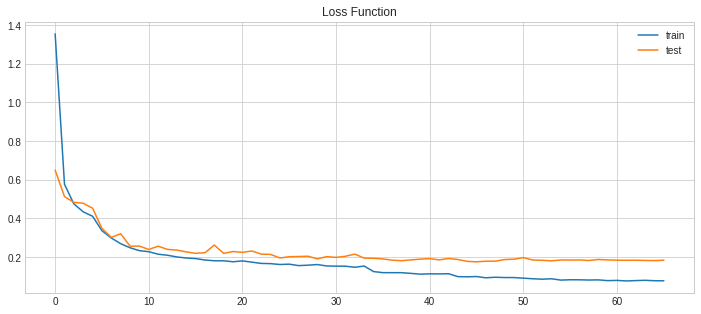

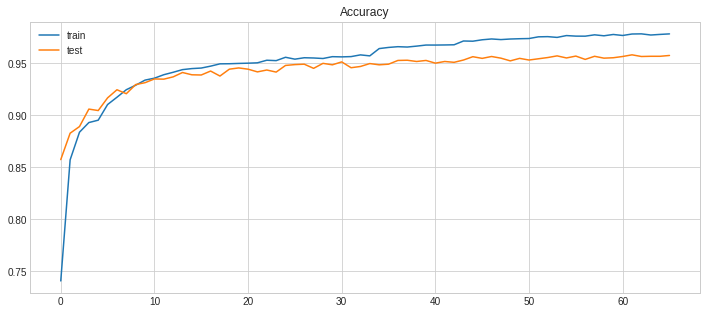

In [0]:
loss_plot(history,0); acc_plot(history,0)

5000/5000 [==============================] - 0s 44us/step


[0.09680938764356542, 0.9762]

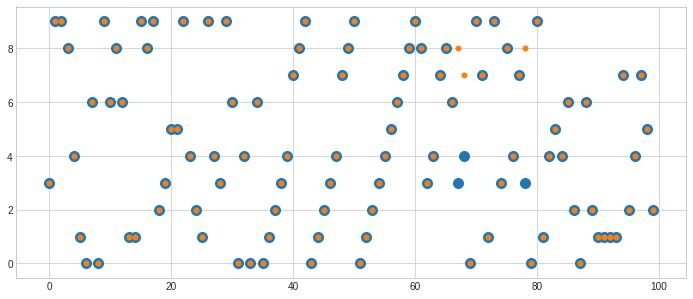

In [0]:
model.load_weights(fw)
y_test2_predictions=model.predict_classes(x_test2.reshape(-1,784))
pylab.figure(figsize=(12,5))
pylab.scatter(range(100),y_test2[:100],s=100)
pylab.scatter(range(100),y_test2_predictions[:100],s=25)
model.evaluate(x_test2.reshape(-1,784),c_y_test2)

Iteration 1, loss = 1.48157142
Iteration 2, loss = 0.19998997
Iteration 3, loss = 0.11511956
0.7140201805629315 0.7073818374933617


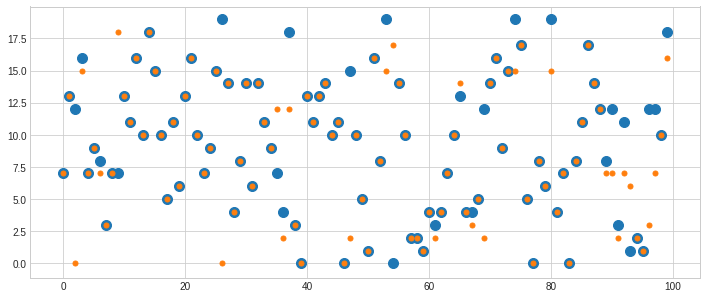

In [0]:
# MLP: Text Classification (News)
clf=MLPClassifier(hidden_layer_sizes=(128,),max_iter=3,solver='adam',
                  verbose=2,random_state=1,learning_rate_init=.01)
clf.fit(x_train3,y_train3); 
print(clf.score(x_test3,y_test3),clf.score(x_valid3,y_valid3))
y_test3_predictions=clf.predict(x_test3)
pylab.figure(figsize=(12,5)); pylab.scatter(range(100),y_test3[:100],s=100)
pylab.scatter(range(100),y_test3_predictions[:100],s=25); pylab.show()

In [0]:
def model():
    model=Sequential()    
    model.add(Dense(128,activation='relu',input_shape=(101322,)))
    model.add(Dropout(rate=0.1))    
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(rate=0.1))    
    model.add(Dense(20,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model=model()
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',verbose=2,
                                               patience=5,factor=0.8)
history=model.fit(x_train3,c_y_train3,validation_data=(x_valid3,c_y_valid3),
                  epochs=30,batch_size=128,verbose=0,
                  callbacks=[early_stopping,checkpointer,lr_reduction]);


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.


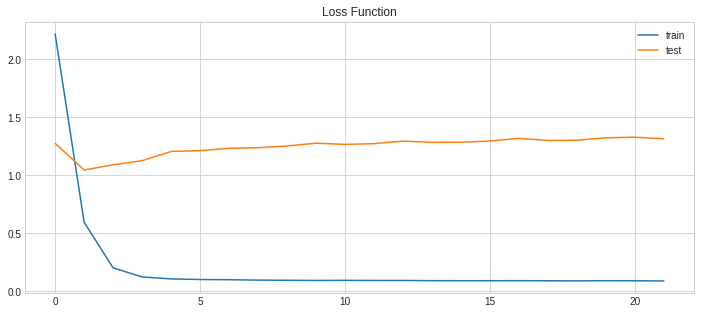

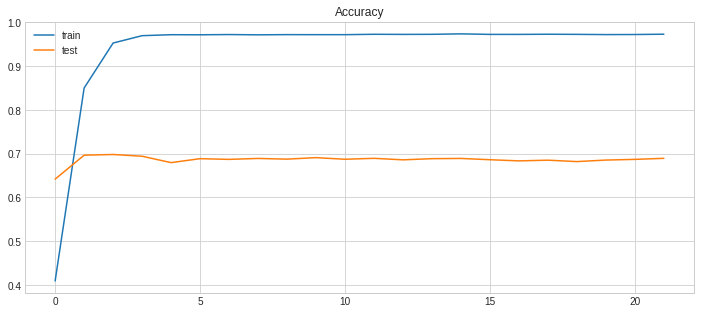

In [0]:
loss_plot(history,0); acc_plot(history,0)

3766/3766 [==============================] - 1s 302us/step


[1.021470087484926, 0.6959638874453556]

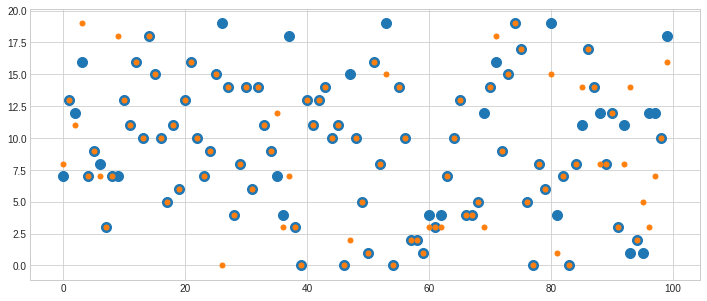

In [0]:
model.load_weights(fw)
y_test3_predictions=model.predict_classes(x_test3)
pylab.figure(figsize=(12,5))
pylab.scatter(range(100),y_test3[:100],s=100)
pylab.scatter(range(100),y_test3_predictions[:100],s=25)
model.evaluate(x_test3,c_y_test3)

In [0]:
# MLP: Regression (Boston)
def model():
    model=Sequential()    
    model.add(Dense(52,activation='relu',input_shape=(13,)))    
    model.add(Dense(52,activation='relu'))     
    model.add(Dense(208,activation='relu'))
    model.add(Dense(208,activation='relu'))    
    model.add(Dense(832,activation='relu'))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])     
    return model
model=model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,verbose=0,
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               patience=5,verbose=2,factor=0.7)
history=model.fit(x_train4,y_train4, validation_data=(x_valid4,y_valid4),
                  epochs=150,batch_size=8,verbose=0,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test4,y_test4)


Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.

Epoch 00031: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.

Epoch 00088: ReduceLROnPlateau reducing learning rate to 5.76480058953166e-05.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 4.0353603617404586e-05.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 2.8247522277524694e-05.

Epoch 00114: ReduceLROnPlateau reducing learning rate to 1.977326610358432e-05.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.3841286272509023e-05.

Epoch 00124: ReduceLR

[32.815213745715575, 4.007587311314602]

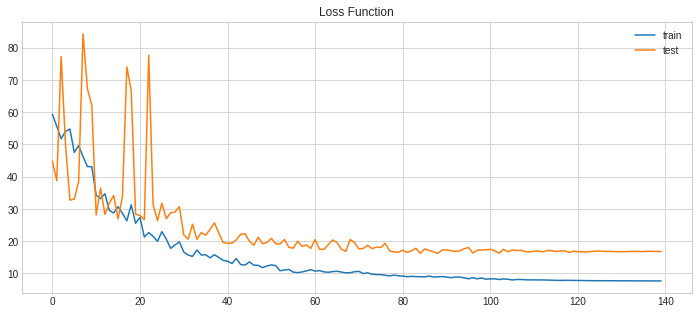

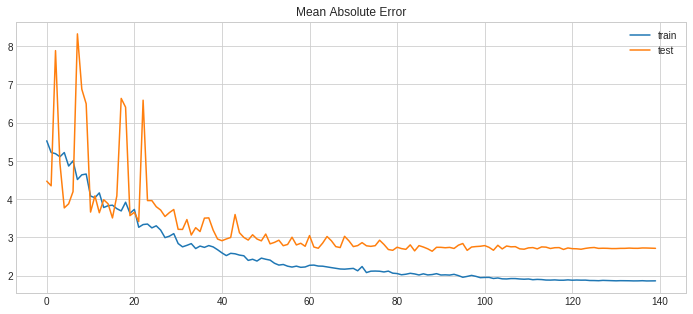

In [0]:
loss_plot(history,10); mae_plot(history,10)

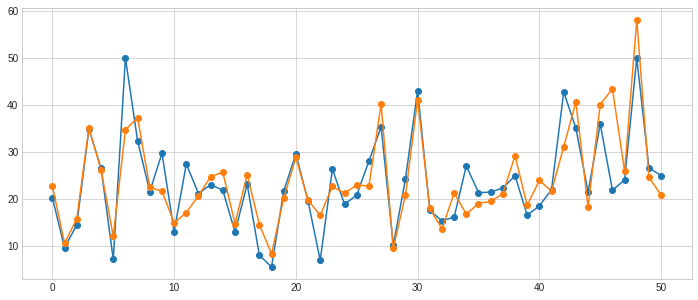

In [0]:
y_test4_predictions=model.predict(x_test4); pylab.figure(figsize=(12,5))
pylab.plot(range(len(y_test4)),y_test4,'-o',label='real data')
pylab.plot(range(len(y_test4)),y_test4_predictions,'-o',label='predictions');

## Convolutional Neural Networks (CNN)

In [0]:
# CNN: Binary Classification (Artificial)
def model():
    model=Sequential()    
    model.add(Conv1D(filters=8,kernel_size=5,padding='same',
                     activation='relu',input_shape=(2,1)))
    model.add(Conv1D(filters=8, kernel_size=5,padding='same',activation='relu'))    
    model.add(MaxPooling1D(pool_size=2))   
    model.add(Dropout(0.1))  
    model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy'])   
    return model
model = model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,
                                               verbose=2,factor=0.5)
history=model.fit(x_train5.reshape(-1,2,1),y_train5.reshape(-1,1,1),
                  validation_data=(x_valid5.reshape(-1,2,1),
                                   y_valid5.reshape(-1,1,1)),
                  epochs=20,batch_size=64,verbose=0,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test5.reshape(-1,2,1),y_test5.reshape(-1,1,1))

1000/1000 [==============================] - 0s 58us/step


[0.0742716476470232, 0.979]

In [0]:
# VGG-like CNN: Multi-Class Classification (Handwritten Letters)
def model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding='same',input_shape=x_train7.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(5,5)))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(96,(5,5),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(5,5)))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(GlobalMaxPooling2D())    
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))    
    model.add(Dense(33,activation='softmax'))    
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                  metrics=['accuracy'])
    return model
model=model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,verbose=2,
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,
                                               verbose=2,factor=0.75)
history=model.fit(x_train7,c_y_train7,validation_data=(x_valid7,c_y_valid7),
                  verbose=0,epochs=50,batch_size=128,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test7,c_y_test7)


Epoch 00001: val_loss improved from inf to 3.49860, saving model to weights.best.model.hdf5

Epoch 00002: val_loss improved from 3.49860 to 3.41089, saving model to weights.best.model.hdf5

Epoch 00003: val_loss improved from 3.41089 to 3.34165, saving model to weights.best.model.hdf5

Epoch 00004: val_loss improved from 3.34165 to 3.30525, saving model to weights.best.model.hdf5

Epoch 00005: val_loss improved from 3.30525 to 2.99014, saving model to weights.best.model.hdf5

Epoch 00006: val_loss improved from 2.99014 to 2.45766, saving model to weights.best.model.hdf5

Epoch 00007: val_loss improved from 2.45766 to 1.73542, saving model to weights.best.model.hdf5

Epoch 00008: val_loss improved from 1.73542 to 1.21504, saving model to weights.best.model.hdf5

Epoch 00009: val_loss improved from 1.21504 to 1.03711, saving model to weights.best.model.hdf5

Epoch 00010: val_loss improved from 1.03711 to 0.86179, saving model to weights.best.model.hdf5

Epoch 00011: val_loss improved fr

[0.21776696195310064, 0.9351656095422095]

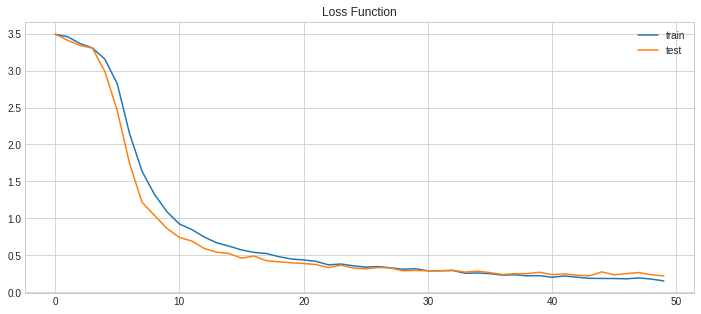

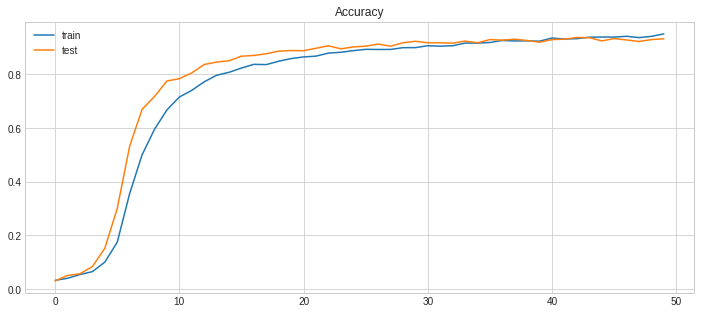

In [0]:
loss_plot(history,0); acc_plot(history,0)

In [0]:
steps,epochs=1000,5
data_generator=keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,
                                                            horizontal_flip=True)
dg_history=model.fit_generator(data_generator.flow(x_train7,c_y_train7,
                                                   batch_size=128),
                               steps_per_epoch=steps,epochs=epochs,
                               verbose=2,validation_data=(x_valid7,c_y_valid7),
                               callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test7,c_y_test7)

Epoch 1/5
 - 43s - loss: 0.7803 - acc: 0.7662 - val_loss: 0.2628 - val_acc: 0.9288

Epoch 00001: val_loss did not improve from 0.21839
Epoch 2/5
 - 43s - loss: 0.4527 - acc: 0.8577 - val_loss: 0.2054 - val_acc: 0.9345

Epoch 00002: val_loss improved from 0.21839 to 0.20544, saving model to weights.best.model.hdf5
Epoch 3/5
 - 43s - loss: 0.3621 - acc: 0.8864 - val_loss: 0.1986 - val_acc: 0.9394

Epoch 00003: val_loss improved from 0.20544 to 0.19860, saving model to weights.best.model.hdf5
Epoch 4/5
 - 43s - loss: 0.3134 - acc: 0.9006 - val_loss: 0.1824 - val_acc: 0.9408

Epoch 00004: val_loss improved from 0.19860 to 0.18242, saving model to weights.best.model.hdf5
Epoch 5/5
 - 43s - loss: 0.2796 - acc: 0.9097 - val_loss: 0.1854 - val_acc: 0.9471

Epoch 00005: val_loss did not improve from 0.18242
1419/1419 [==============================] - 0s 77us/step


[0.18756047069207307, 0.9429175477787338]

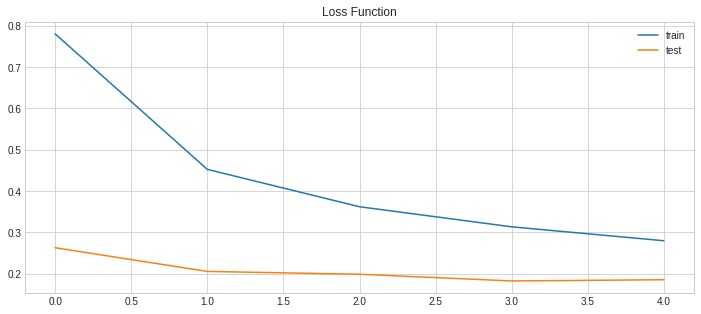

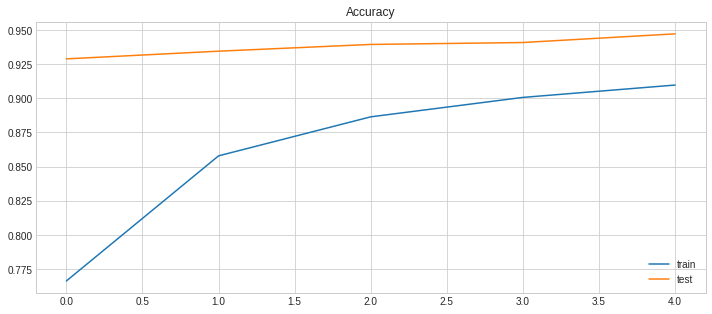

In [0]:
loss_plot(dg_history,0); acc_plot(dg_history,0)

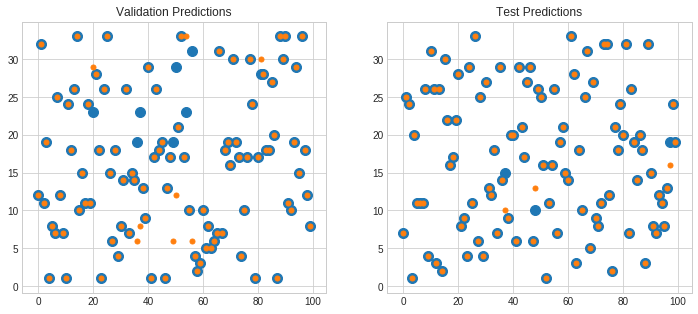

In [0]:
y_valid7_predictions=model.predict_classes(x_valid7)
y_test7_predictions=model.predict_classes(x_test7)
pylab.figure(1,figsize=(12,5))
pylab.subplot(121); pylab.scatter(range(100),y_valid7[:100],s=100)
pylab.scatter(range(100),y_valid7_predictions[:100]+1,s=25)
pylab.title("Validation Predictions")
pylab.subplot(122); pylab.scatter(range(100),y_test7[:100],s=100)
pylab.scatter(range(100),y_test7_predictions[:100]+1,s=25)
pylab.title("Test Predictions");

In [0]:
# VGG-like CNN: Multi-Class Classification (Decors)
def model(leaky_alpha):
    model = Sequential()
    model.add(Conv2D(32,(5,5),padding='same',input_shape=x_train8.shape[1:]))
    model.add(LeakyReLU(alpha=leaky_alpha))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(96,(5,5)))
    model.add(LeakyReLU(alpha=leaky_alpha))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))    
    model.add(GlobalMaxPooling2D())     
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=leaky_alpha))
    model.add(Dropout(0.25))     
    model.add(Dense(7))
    model.add(Activation('softmax'))    
    model.compile(loss='categorical_crossentropy',optimizer='nadam',
                  metrics=['accuracy'])    
    return model
model=model(0.005)
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,verbose=0,
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,
                                               verbose=2,factor=0.75)
history=model.fit(x_train8,c_y_train8,epochs=45,batch_size=16,verbose=2,
                  validation_data=(x_valid8,c_y_valid8),
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test8,c_y_test8)

Train on 388 samples, validate on 49 samples
Epoch 1/45
 - 1s - loss: 1.9334 - acc: 0.2680 - val_loss: 1.8081 - val_acc: 0.3061
Epoch 2/45
 - 0s - loss: 1.5320 - acc: 0.4098 - val_loss: 1.4917 - val_acc: 0.4082
Epoch 3/45
 - 0s - loss: 1.1773 - acc: 0.5232 - val_loss: 1.7914 - val_acc: 0.2041
Epoch 4/45
 - 0s - loss: 1.0544 - acc: 0.5928 - val_loss: 1.2786 - val_acc: 0.5510
Epoch 5/45
 - 0s - loss: 0.8574 - acc: 0.6572 - val_loss: 1.2372 - val_acc: 0.4694
Epoch 6/45
 - 0s - loss: 0.8037 - acc: 0.7165 - val_loss: 1.2571 - val_acc: 0.6327
Epoch 7/45
 - 0s - loss: 0.6405 - acc: 0.7629 - val_loss: 1.1990 - val_acc: 0.5918
Epoch 8/45
 - 0s - loss: 0.6322 - acc: 0.7577 - val_loss: 1.7062 - val_acc: 0.5102
Epoch 9/45
 - 0s - loss: 0.6179 - acc: 0.8093 - val_loss: 0.9719 - val_acc: 0.6939
Epoch 10/45
 - 0s - loss: 0.4998 - acc: 0.8325 - val_loss: 1.5378 - val_acc: 0.4694
Epoch 11/45
 - 0s - loss: 0.5834 - acc: 0.7861 - val_loss: 1.0791 - val_acc: 0.6939
Epoch 12/45
 - 0s - loss: 0.4258 - acc: 

[0.2894626458485921, 0.8958333333333334]

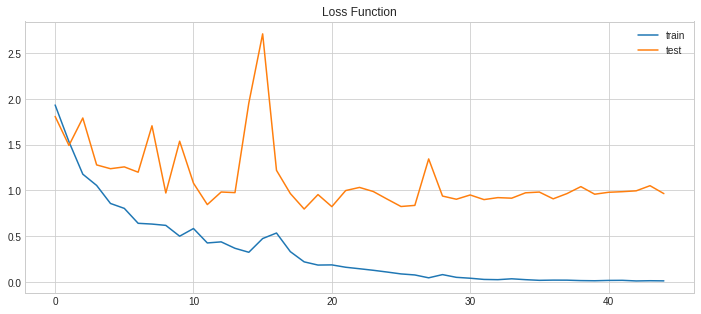

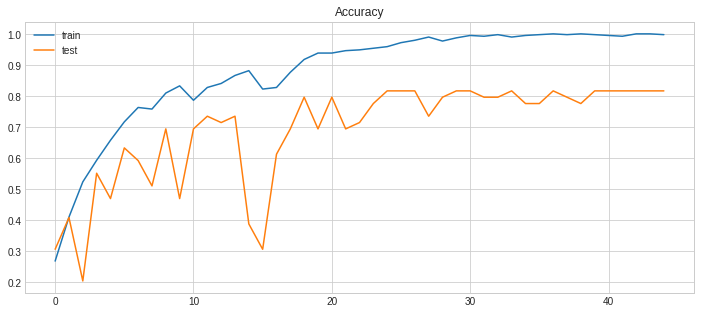

In [0]:
loss_plot(history,0); acc_plot(history,0)

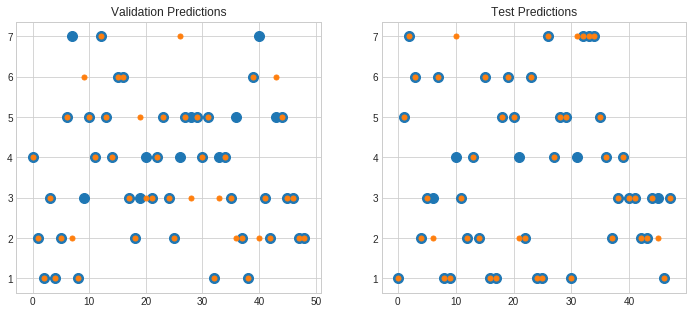

In [0]:
y_valid8_predictions=model.predict_classes(x_valid8) 
y_test8_predictions=model.predict_classes(x_test8)
pylab.figure(1,figsize=(12,5))
pylab.subplot(121); pylab.scatter(range(len(y_valid8)),y_valid8,s=100)
pylab.scatter(range(len(y_valid8)),y_valid8_predictions+1,s=25)
pylab.title("Validation Predictions")
pylab.subplot(122); pylab.scatter(range(len(y_test8)),y_test8,s=100)
pylab.scatter(range(len(y_test8)),y_test8_predictions+1,s=25)
pylab.title("Test Predictions");

In [0]:
# CNN: Regression (Boston)
def model():
    model=Sequential()    
    model.add(Conv1D(52,5,padding='valid',activation='relu',input_shape=(13,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(208,3,padding='valid',activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))    
    model.add(Flatten())
    model.add(Dense(1024,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
    return model    
model=model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,verbose=0,
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=10,
                                               verbose=2,factor=0.95)
history=model.fit(x_train4.reshape(-1,13,1),y_train4,
                  validation_data=(x_valid4.reshape(-1,13,1),y_valid4),
                  epochs=300,batch_size=16,verbose=0,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test4.reshape(-1,13,1),y_test4)


Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.

Epoch 00029: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.

Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.0008573750033974647.

Epoch 00053: ReduceLROnPlateau reducing learning rate to 0.0008145062311086804.

Epoch 00063: ReduceLROnPlateau reducing learning rate to 0.0007737808919046074.

Epoch 00078: ReduceLROnPlateau reducing learning rate to 0.000735091819660738.

Epoch 00089: ReduceLROnPlateau reducing learning rate to 0.0006983372120885178.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 0.0006634203542489559.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 0.0006302493420662358.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 0.0005987368611386045.

Epoch 00129: ReduceLROnPlateau reducing learning rate to 0.0005688000208465382.

Epoch 00139: ReduceLROnPlateau reducing learning rate to 0.0005403600225690752.

Epoch 00150: ReduceLROnPlate

[34.2029499727137, 4.179110732733035]

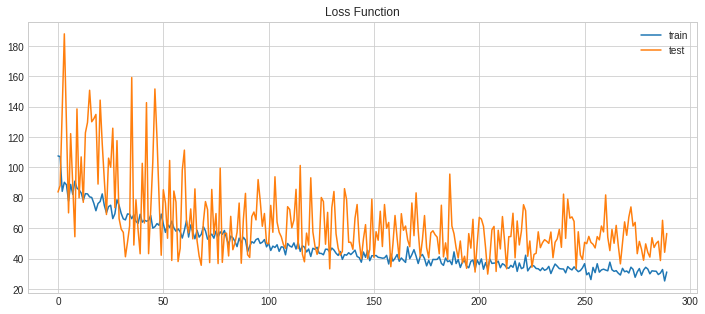

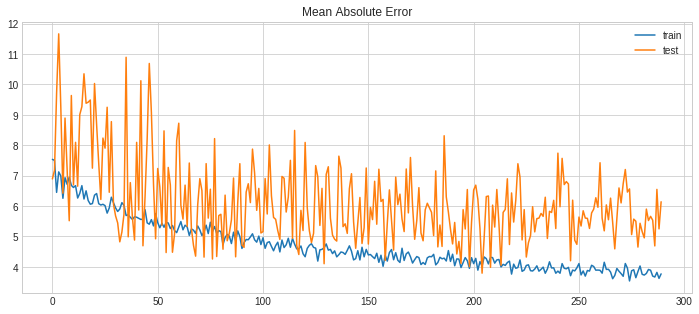

In [0]:
loss_plot(history,10); mae_plot(history,10)

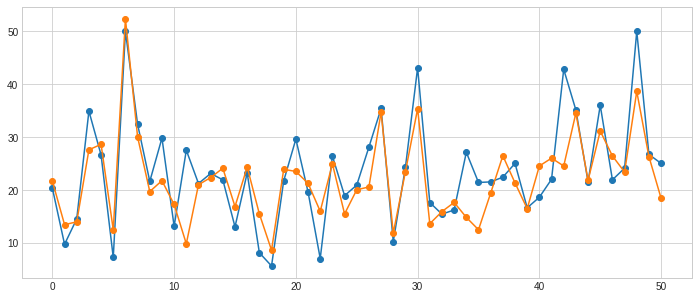

In [0]:
y_test4_predictions=model.predict(x_test4.reshape(-1,13,1))
pylab.figure(figsize=(12,5))
pylab.plot(range(len(y_test4)),y_test4,'-o',label='real data')
pylab.plot(range(len(y_test4)),y_test4_predictions,'-o',label='predictions');

## Recurrent Neural Networks (RNN)

In [0]:
def model():
    model=Sequential()
    model.add(LSTM(64,dropout=0.2,recurrent_dropout=0.2,input_shape=(1,2)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',
                  metrics=['accuracy'])         
    return model 
model=model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,verbose=0,
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=10,
                                               verbose=2,factor=0.75)
history=model.fit(x_train5.reshape(-1,1,2),y_train5,
                  validation_data=(x_valid5.reshape(-1,1,2),y_valid5),
                  epochs=20,batch_size=16,verbose=0,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test5.reshape(-1,1,2),y_test5)

1000/1000 [==============================] - 0s 94us/step


[0.08828510692715645, 0.979]

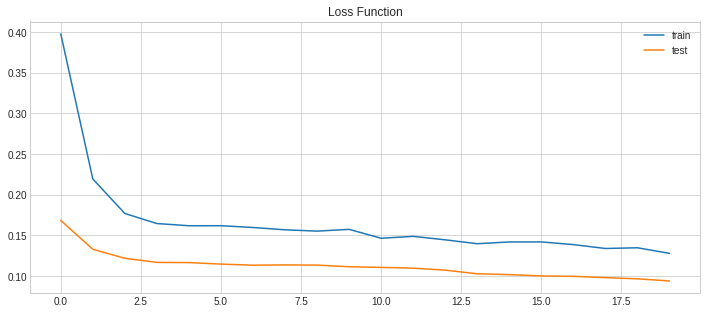

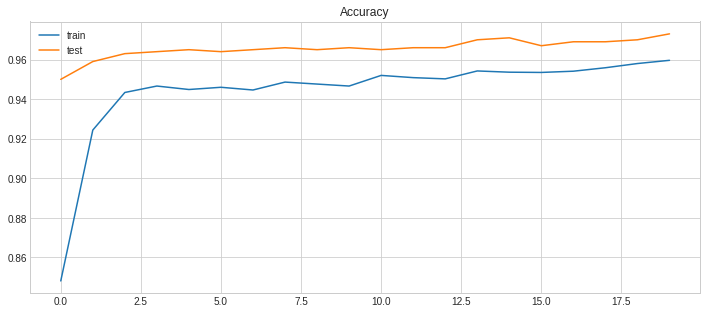

In [0]:
loss_plot(history,0); acc_plot(history,0)

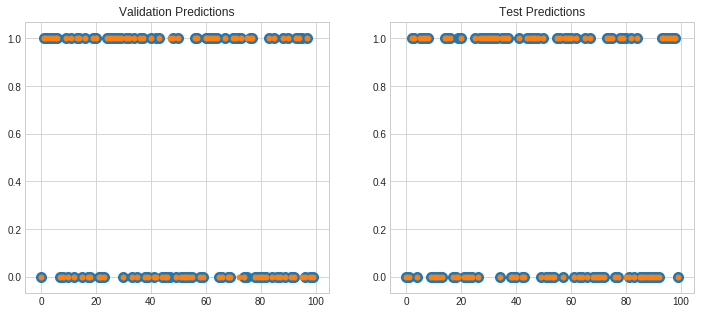

In [0]:
y_valid5_predictions=model.predict_classes(x_valid5.reshape(-1,1,2))[:100]
y_test5_predictions=model.predict_classes(x_test5.reshape(-1,1,2))[:100]
pylab.figure(1,figsize=(12,5))
pylab.subplot(121); pylab.scatter(range(100),y_valid5[:100],s=100)
pylab.scatter(range(100),y_valid5_predictions,s=25)
pylab.title("Validation Predictions")
pylab.subplot(122); pylab.scatter(range(100),y_test5[:100],s=100)
pylab.scatter(range(100),y_test5_predictions,s=25)
pylab.title("Test Predictions");

In [0]:
# RNN: Multi-Class Classification
def model():
    model=Sequential()
    model.add(LSTM(112,return_sequences=True,input_shape=(1,784)))   
    model.add(LSTM(112,return_sequences=True)) 
    model.add(LSTM(112))      
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='nadam',
                  metrics=['accuracy'])    
    return model
model=model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath=fw,verbose=0,
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=10,
                                               verbose=2,factor=0.85)
history=model.fit(x_train2.reshape(-1,1,784),c_y_train2,
                  validation_data=(x_valid2.reshape(-1,1,784),c_y_valid2),
                  epochs=10,batch_size=128,verbose=0,
                  callbacks=[checkpointer, lr_reduction])
model.load_weights(fw)
model.evaluate(x_test2.reshape(-1,1,784),c_y_test2)

5000/5000 [==============================] - 1s 138us/step


[0.22101017208099366, 0.9298]

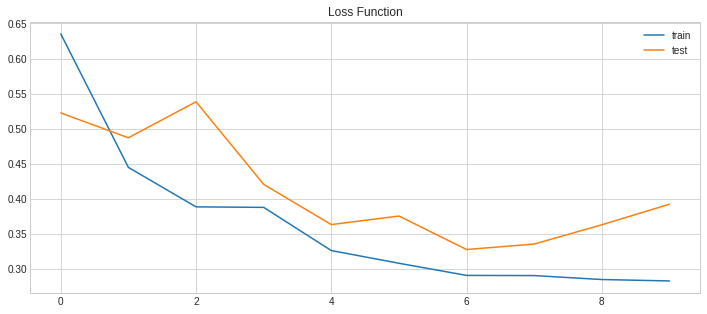

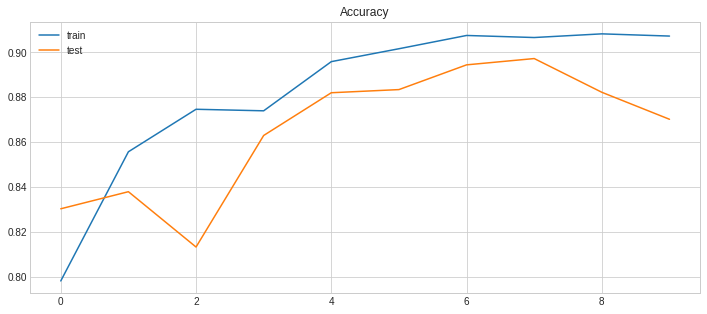

In [0]:
loss_plot(history,0); acc_plot(history,0)

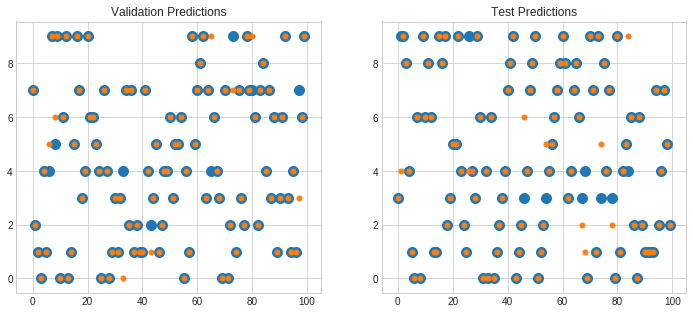

In [0]:
y_valid2_predictions=model.predict_classes(x_valid2.reshape(-1,1,784))[:100]
y_test2_predictions=model.predict_classes(x_test2.reshape(-1,1,784))[:100]
pylab.figure(1,figsize=(12,5))
pylab.subplot(121); pylab.scatter(range(100),y_valid2[:100],s=100)
pylab.scatter(range(100),y_valid2_predictions,s=25)
pylab.title("Validation Predictions")
pylab.subplot(122); pylab.scatter(range(100),y_test2[:100],s=100)
pylab.scatter(range(100),y_test2_predictions,s=25)
pylab.title("Test Predictions");